In [1]:
import numpy as np
import pandas as pd

import pandas_datareader as data
import yfinance as yf
from datetime import datetime


In [2]:
x=input('Enter ticker Name: ')
# Define the stock symbol and date range
start_date = '2008-01-01'
end_date = '2023-12-31'

# Download historical stock data
df = yf.download(x, start=start_date, end=end_date)

Enter ticker Name: AAPL


[*********************100%%**********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,7.116786,7.152143,6.876786,6.958571,5.898640,1079178800
2008-01-03,6.978929,7.049643,6.881786,6.961786,5.901366,842066400
2008-01-04,6.837500,6.892857,6.388929,6.430357,5.450883,1455832000
2008-01-07,6.473214,6.557143,6.079643,6.344286,5.377923,2072193200
2008-01-08,6.433571,6.516429,6.100000,6.116071,5.184468,1523816000


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.600006,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,193.149994,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.580002,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.529999,42628800


In [5]:
df = df.reset_index()

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-02,7.116786,7.152143,6.876786,6.958571,5.898639,1079178800
1,2008-01-03,6.978929,7.049643,6.881786,6.961786,5.901363,842066400
2,2008-01-04,6.837500,6.892857,6.388929,6.430357,5.450884,1455832000
3,2008-01-07,6.473214,6.557143,6.079643,6.344286,5.377925,2072193200
4,2008-01-08,6.433571,6.516429,6.100000,6.116071,5.184471,1523816000


In [7]:
df = df.drop(['Date','Adj Close'],axis = 1)

In [8]:
 df.head()

,Open,High,Low,Close,Volume
0,7.116786,7.152143,6.876786,6.958571,1079178800
1,6.978929,7.049643,6.881786,6.961786,842066400
2,6.837500,6.892857,6.388929,6.430357,1455832000
3,6.473214,6.557143,6.079643,6.344286,2072193200
4,6.433571,6.516429,6.100000,6.116071,1523816000


In [9]:
pip install --user matplotlib

Note: you may need to restart the kernel to use updated packages.


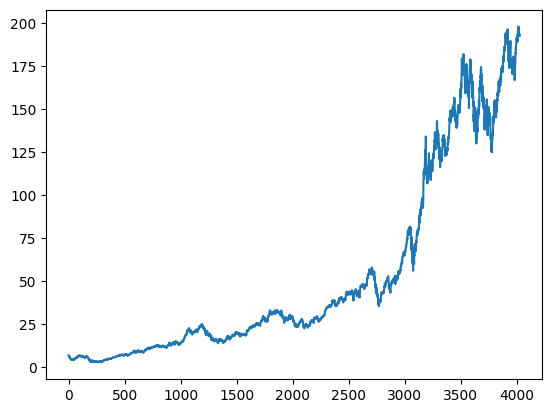

In [10]:
import matplotlib.pyplot as plt

plt.plot(df.Close) 

In [11]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4022    181.768301
4023    181.787101
4024    181.898701
4025    182.046001
4026    182.173301
Name: Close, Length: 4027, dtype: float64

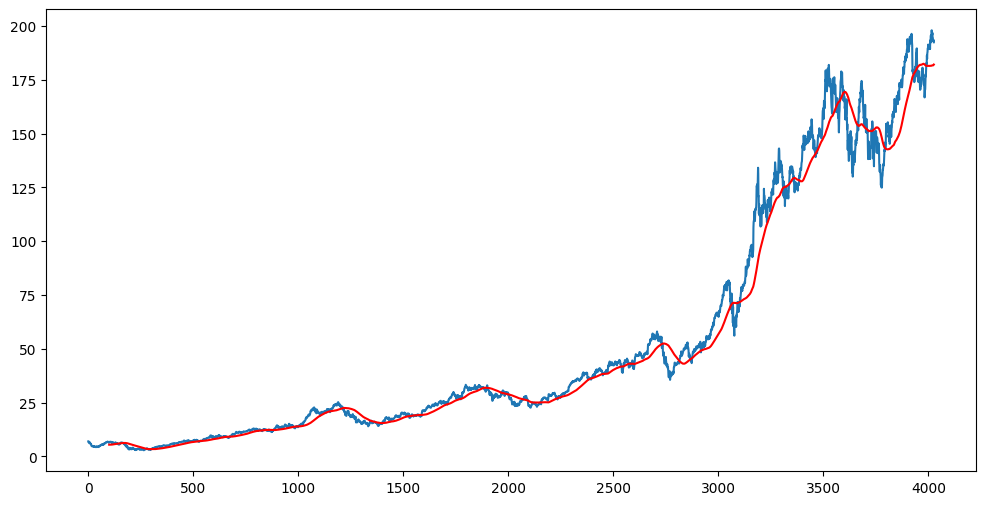

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [13]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4022    178.649100
4023    178.871851
4024    179.085250
4025    179.290201
4026    179.487900
Name: Close, Length: 4027, dtype: float64

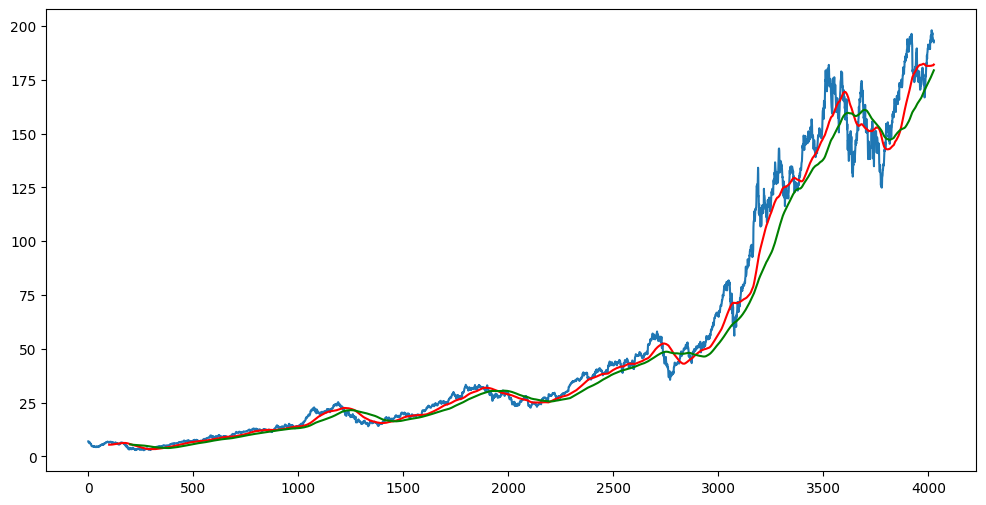

In [14]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [15]:
df.shape

(4027, 5)

In [16]:
#splitting
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [17]:
print(data_training.shape)
print(data_testing.shape)

(2818, 1)
(1209, 1)


In [18]:
data_training.head()


,Close
0,6.958571
1,6.961786
2,6.430357
3,6.344286
4,6.116071


In [19]:
data_testing.head()

,Close
2818,45.932499
2819,46.529999
2820,47.005001
2821,46.632500
2822,47.040001


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [21]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.07543216],
       [0.07549037],
       [0.06586733],
       ...,
       [0.75930124],
       [0.76840049],
       [0.77202207]])

In [22]:
data_training_array.shape

(2818, 1)

In [23]:
x_train = []
y_train = []

In [24]:


for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [25]:
x_train.shape

(2718, 100, 1)

In [26]:
!pip install keras

In [27]:
!pip install tensorflow

In [28]:
from keras.layers import Dense, Dropout, LSTM


In [29]:
from keras.models import Sequential

In [30]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu',))
model.add(Dropout(0.5))

model.add(Dense(units =1))



In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [32]:
model.compile(optimizer='adam',loss= 'mean_squared_error')
model.fit(x_train,y_train,epochs=50)


Epoch 1/50

85/85 [==============================] - 17s 139ms/step - loss: 0.0295
Epoch 2/50
85/85 [==============================] - 13s 155ms/step - loss: 0.0070
Epoch 3/50
85/85 [==============================] - 13s 157ms/step - loss: 0.0055
Epoch 4/50
85/85 [==============================] - 13s 156ms/step - loss: 0.0057
Epoch 5/50
85/85 [==============================] - 13s 155ms/step - loss: 0.0045
Epoch 6/50
85/85 [==============================] - 13s 157ms/step - loss: 0.0039
Epoch 7/50
85/85 [==============================] - 13s 154ms/step - loss: 0.0041
Epoch 8/50
85/85 [==============================] - 14s 162ms/step - loss: 0.0037
Epoch 9/50
85/85 [==============================] - 15s 171ms/step - loss: 0.0037
Epoch 10/50
85/85 [==============================] - 14s 169ms/step - loss: 0.0036
Epoch 11/50
85/85 [==============================] - 13s 158ms/step - loss: 0.0034
Epoch 12/50
85/85 [==============================] - 14s 159ms/step - loss: 0.0030
Epoch 13/50

In [33]:
model.save('keras_model.h5')

C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
model.save('my_model.keras')

In [34]:
data_testing.head(100)

,Close
2818,45.932499
2819,46.529999
2820,47.005001
2821,46.632500
2822,47.040001
...,...
2913,52.195000
2914,53.259998
2915,52.107498
2916,51.005001


In [35]:
past_100_days = data_training.tail(100)

In [36]:
print(past_100_days)

          Close
2718  55.297501
2719  54.005001
2720  54.827499
2721  55.162498
2722  55.682499
...         ...
2813  43.125000
2814  43.227501
2815  44.724998
2816  45.227501
2817  45.427502

[100 rows x 1 columns]


In [37]:
import pandas as pd

In [38]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [39]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1309 non-null   float64
dtypes: float64(1)
memory usage: 10.4 KB


In [40]:
final_df.head()

,Close
0,55.297501
1,54.005001
2,54.827499
3,55.162498
4,55.682499


In [41]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.12149173],
       [0.11354095],
       [0.11860053],
       ...,
       [0.96948862],
       [0.9721338 ],
       [0.96567473]])

In [42]:
input_data.shape

(1309, 1)

In [43]:
x_test = []
y_test = []

In [44]:
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
x_test, y_test = np.array(x_test), np.array(y_test)

In [45]:
print(x_test.shape)
print(y_test.shape)

(1209, 100, 1)
(1209,)


In [46]:
#prediction
y_predicted = model.predict(x_test)

38/38 [==============================] - 3s 66ms/step


In [47]:
y_predicted.shape

(1209, 1)

In [48]:
y_test

array([0.06388311, 0.06755862, 0.07048059, ..., 0.96948862, 0.9721338 ,
       0.96567473])

In [49]:
y_predicted

array([[0.12754712],
       [0.12808484],
       [0.12869562],
       ...,
       [0.88081306],
       [0.8769526 ],
       [0.8727578 ]], dtype=float32)

In [50]:
scaler.scale_

array([0.00615148])

In [51]:
scale_factor = 1/0.00646057
y_predicted = y_predicted * scale_factor
y_test = y_test *scale_factor

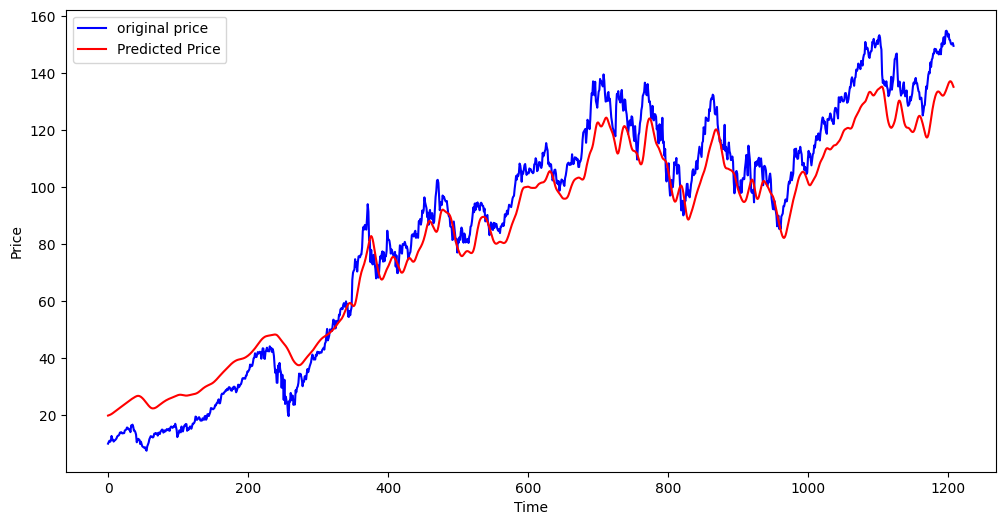

In [52]:
plt.figure(figsize = (12,6))
plt.plot(y_test,'b', label = 'original price')
plt.plot(y_predicted, 'r',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()